##Student Project 1 - Salary Analysis

* Tujuan : Mengetahui hubungan lama pengalaman kerja dan jumlah gaji yang diterima
* Dataset : Salary_dataset.csv
* Methods :
  * OLS (statmodel)
  * Bayesian Regression (sklearn)
  * SVM Regression (sklearn)

## Visualization

In [2]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib     
%matplotlib inline  

In [4]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import statsmodels.formula.api as smf

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# ambil data (load dataset)
filename = '/content/drive/MyDrive/Training/datasets/Salary_dataset.csv'
salary=pd.read_csv(filename)
salary.head()

,No,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [8]:
# mengetahui shape dari data yang digunakan
salary.shape


(30, 3)

In [9]:
# mengetahui data type dari tiap column
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [10]:
#mengetahui hasil analisa statistik untuk tiap column
salary.describe()

,No,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


array([[<Axes: title={'center': 'No'}>,
        <Axes: title={'center': 'YearsExperience'}>],
       [<Axes: title={'center': 'Salary'}>, <Axes: >]], dtype=object)

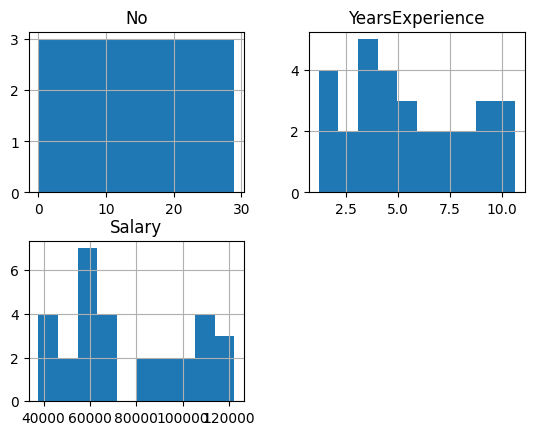

In [11]:
#menampilkan Histogram
salary.hist()

<Axes: >

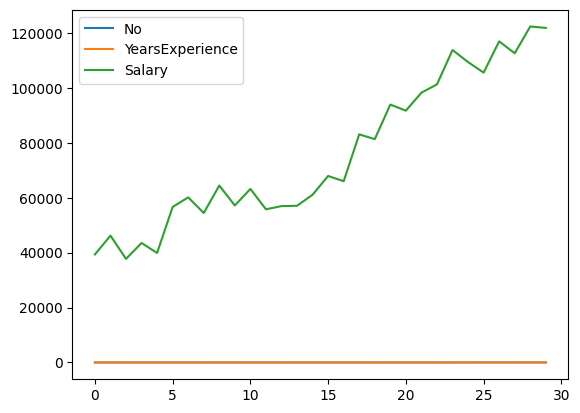

In [12]:
#menampilkan Plot
salary.plot()

Box plot


<Axes: >

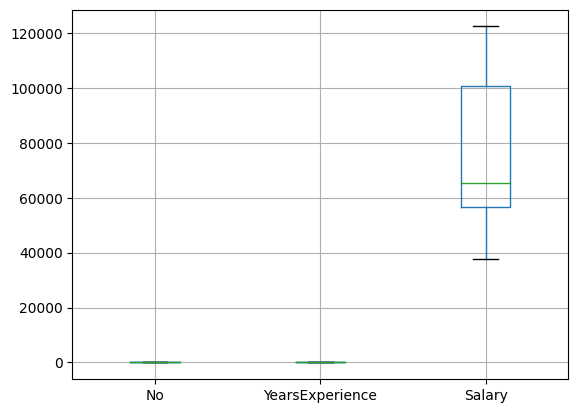

In [ ]:
print("Box plot")
salary.boxplot()

## Preprocessing

In [13]:
# Menghapus column name 'No'
salary = salary.drop(['No'], axis=1)
salary.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [ ]:
# Cek data apakah terdapat data kosong
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
# Cek data apakah terdapat data yang terduplikat 
salary.duplicated().sum()

0

In [ ]:
#mengetahui korelasi antara salary dan yearsexperience
corr = salary.corr()

corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='YearsExperience', ylabel='Salary'>

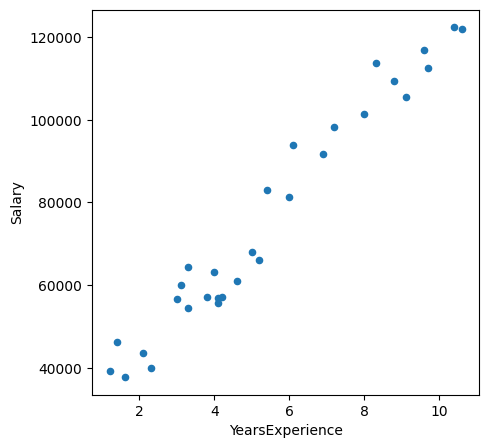

In [ ]:
# untuk mengetahui plot scatter
salary.plot(kind='scatter', x='YearsExperience', y='Salary', figsize=(5,5))

## Method : Ordinary Least Squares (OLS)

---



In [ ]:
salary.head ()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [18]:
# Membuat Model OLS
# Model 1: Hubungan linier antara Salary dan Years Experience
model1=smf.ols(formula='Salary~YearsExperience',data=salary).fit()

In [19]:
model1.params

Intercept          24848.203967
YearsExperience     9449.962321
dtype: float64

In [20]:
model1.pvalues

Intercept          1.816526e-11
YearsExperience    1.143068e-20
dtype: float64

In [21]:
model1.rsquared

0.9569566641435086

In [22]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        13:59:50   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.485e+04   2306.654     10.772      0.000    2.01e+04    2.96e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Prediksi salary berdasarkan persamaan 
salary_pred=model1.predict(pd.DataFrame(salary['YearsExperience']))
salary_pred

0      36188.158752
1      38078.151217
2      39968.143681
3      44693.124842
4      46583.117306
5      53198.090931
6      54143.087163
7      56033.079627
8      56033.079627
9      60758.060788
10     62648.053252
11     63593.049484
12     63593.049484
13     64538.045717
14     68318.030645
15     72098.015574
16     73988.008038
17     75878.000502
18     81547.977895
19     82492.974127
20     90052.943985
21     92887.932681
22    100447.902538
23    103282.891235
24    108007.872395
25    110842.861092
26    115567.842252
27    116512.838485
28    123127.812110
29    125017.804574
dtype: float64

In [24]:
# mengetahui prediksi secara manual
salary_pred2 = 9449.962321*salary['YearsExperience']+24848.20
salary_pred2

0      36188.154785
1      38078.147249
2      39968.139714
3      44693.120874
4      46583.113338
5      53198.086963
6      54143.083195
7      56033.075659
8      56033.075659
9      60758.056820
10     62648.049284
11     63593.045516
12     63593.045516
13     64538.041748
14     68318.026677
15     72098.011605
16     73988.004069
17     75877.996533
18     81547.973926
19     82492.970158
20     90052.940015
21     92887.928711
22    100447.898568
23    103282.887264
24    108007.868425
25    110842.857121
26    115567.838282
27    116512.834514
28    123127.808138
29    125017.800603
Name: YearsExperience, dtype: float64

In [26]:
# Hitung RMSE dan RSE untuk model 1 (dengan mode manual)
salary['salary_pred']=salary_pred

# RMSE
salary['RSEd']=(salary['Salary']-salary['salary_pred'])**2
RSEd=salary.sum()['RSEd']
RMSE=np.sqrt(RSEd/30)
#RSE=np.sqrt(RSEd/28) # # Df Residuals (n-p-1): 30-1-1 = 28 
# [1/(n-p-1)]:n=jumlah titik data;p=jumlah variabel prediktor 

# RSE
salary_pred_mean=np.mean(salary['salary_pred'])
salary['RSEp']=(salary_pred_mean-salary['salary_pred'])**2
RSEp=salary.sum()['RSEp']
RSE=RSEd/RSEp

salary_mean = np.mean(salary['Salary'])
error=RMSE/salary_mean
# print nilai RSE,sales_mean,error
RMSE,RSE,error

(5592.043608760659, 0.044979399244809, 0.0735756487653368)

In [ ]:
# pakai fungsi rmse 
from statsmodels.tools.eval_measures import rmse

# calc rmse
rmse_val = rmse(salary['Salary'], salary_pred)
rmse_val

5592.193147626327

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Salary vs YearsExperience')

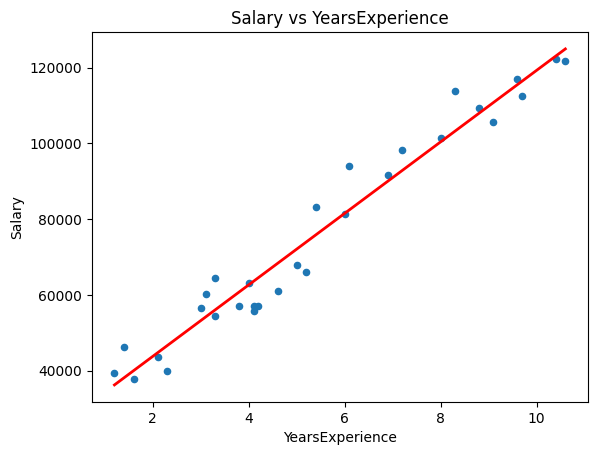

In [ ]:
# Plot salary yang diprediksi vs YearsExperience 
salary.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.plot(pd.DataFrame(salary['YearsExperience']),salary_pred,c='red',linewidth=2)
plt.title('Salary vs YearsExperience')

## Metode Bayesian Regression (sklearn)

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn
sklearn.__version__

'1.2.2'

In [ ]:
regr_bayes = linear_model.BayesianRidge()
regr_bayes.get_params()

{'alpha_1': 1e-06,
 'alpha_2': 1e-06,
 'alpha_init': None,
 'compute_score': False,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 1e-06,
 'lambda_2': 1e-06,
 'lambda_init': None,
 'n_iter': 300,
 'tol': 0.001,
 'verbose': False}

RMSE: 5592.19


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Predicted Salary vs YearsExperience - Bayesian Regression')

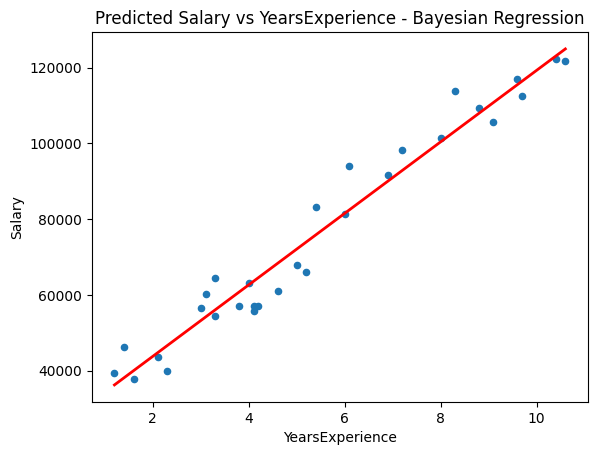

In [ ]:
# Salary Analysis
years = salary['YearsExperience'].values.reshape(-1,1)
salarys = salary['Salary'].values.reshape(-1,1)

# Train model dengan training set
regr_bayes.fit(years, salarys.ravel())

# buat prediksi dengan data testing
salary_pred2 = regr_bayes.predict(years)

# RMSE
print('RMSE: %.2f'
      % mean_squared_error(salarys, salary_pred2, squared = False))

# Plot pengalaman yang diprediksi vs salary
salary.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.plot(pd.DataFrame(salary['YearsExperience']),salary_pred2,c='red',linewidth=2)
plt.title('Predicted Salary vs YearsExperience - Bayesian Regression')

#SVM Regression (sklearn)

In [ ]:
# Membbuat objek SVM regression
from sklearn import svm
regr_svm1 = svm.LinearSVR()
regr_svm1.get_params()

{'C': 1.0,
 'dual': True,
 'epsilon': 0.0,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'loss': 'epsilon_insensitive',
 'max_iter': 1000,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

Coefficients: 
 [162.4]
RMSE: 79636.99


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Predicted Salary vs YearsExperience - Bayesian Regression')

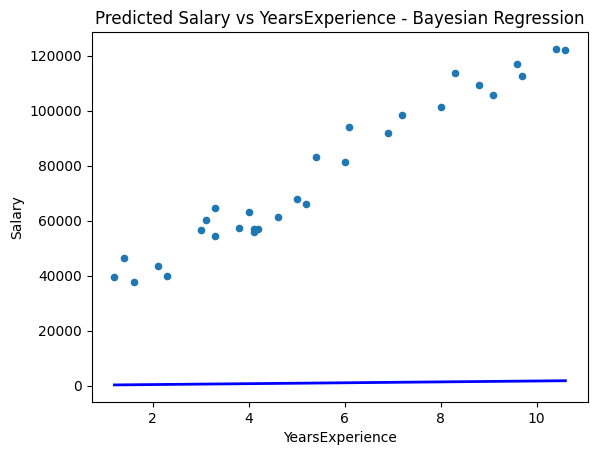

In [ ]:
# Train model dengan training set
regr_svm1.fit(years,salarys.ravel())

# membuat prediksi dengan data testing
salary_pred3 = regr_svm1.predict(years)

# Nilai koefesien The coefficients
print('Coefficients: \n', regr_svm1.coef_)

# RMSE
print('RMSE: %.2f'
      % mean_squared_error(salarys, salary_pred3, squared = False))

# Plot Salary diprediksi VS Experience
salary.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.plot(pd.DataFrame(salary['YearsExperience']),salary_pred3,c='blue',linewidth=2)
plt.title('Predicted Salary vs YearsExperience - Bayesian Regression')